In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False

### 4.1 선형 회귀

##### 4.1.1 정규방정식

$$
\hat{\mathbf{W}} = \left( \mathbf{X}^{T} \cdot \mathbf{X} \right)^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}
$$

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


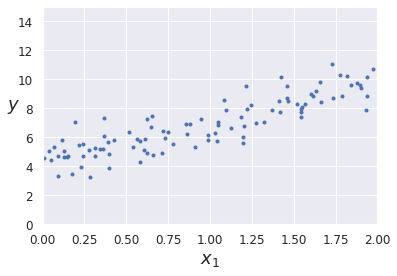

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)


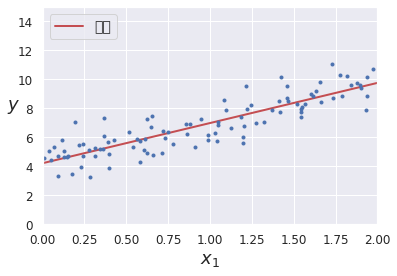

In [6]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [8]:
# 사이킷런을 이용한 회귀분석

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

### 4.2 경사 하강법

##### 4.2.1 배치 경사 하강법

- 편도함수

$$
\frac{\partial}{\partial w_j} MSE(\mathbf{W}) = \frac{2}{m} \sum_{i=1}^{m}{\left( \mathbf{W}^{T} \cdot \mathbf{x}_{i} - y_{i}\right)}x_{ij}
$$

$$
\nabla_{\mathbf{W}} \text{MSE}(\mathbf{W}) = \begin{bmatrix} \frac { \partial  }{ \partial w_{ i } } { MSE }(W) \\ \vdots \\ \frac { \partial  }{ \partial w_{ i } } { MSE }(W) \end{bmatrix} = \frac{2}{m} \mathbf{X}^{T} \cdot \left( \mathbf{X} \cdot \mathbf{W} - \mathbf{y} \right)
$$

- 경사 하강법 Step

$$
\mathrm{W} \leftarrow \mathrm{W} - \eta \nabla_{\mathbf{W}} \text{MSE}(\mathbf{W}) \Longleftrightarrow 
 \mathrm{W} \leftarrow \mathrm{W} - \eta \frac{\partial L}{\partial \mathrm{W}} 
$$

In [10]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

weight = np.random.randn(2, 1)  # random init

for step in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - eta * gradients
    
    if (step+1) % 200 == 0:
        print('Step :{:04d}, weight = \n {}'.format(step+1, weight))
    
print('최종 결과값 : \n{}'.format(weight))

Step :0200, weight = 
 [[4.21338573]
 [2.7716236 ]]
Step :0400, weight = 
 [[4.21509444]
 [2.7701149 ]]
Step :0600, weight = 
 [[4.21509616]
 [2.77011339]]
Step :0800, weight = 
 [[4.21509616]
 [2.77011339]]
Step :1000, weight = 
 [[4.21509616]
 [2.77011339]]
최종 결과값 : 
[[4.21509616]
 [2.77011339]]


In [11]:
weight_path_bgd = []

def plot_gradient_descent(weight, eta, weight_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(weight)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - eta * gradients
        if weight_path is not None:
            weight_path.append(weight)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


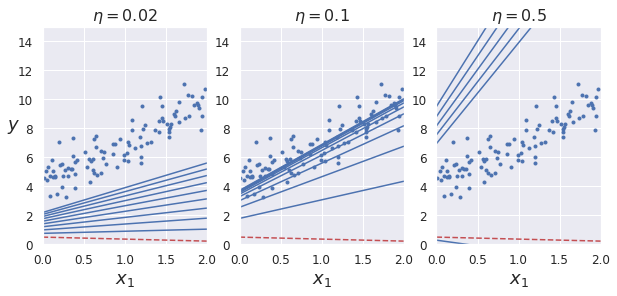

In [12]:
np.random.seed(42)
weight = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(weight, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(weight, eta=0.1, weight_path=weight_path_bgd)
plt.subplot(133); plot_gradient_descent(weight, eta=0.5)
plt.show()

##### 4.2.2 확률적 경사 하강법

Epoch :010, weight = 
 [[4.06816038]
 [2.87191524]]
Epoch :020, weight = 
 [[4.31147477]
 [2.36946783]]
Epoch :030, weight = 
 [[4.15164305]
 [3.02460342]]
Epoch :040, weight = 
 [[4.52385874]
 [2.57195944]]
Epoch :050, weight = 
 [[3.7625155]
 [2.5892927]]


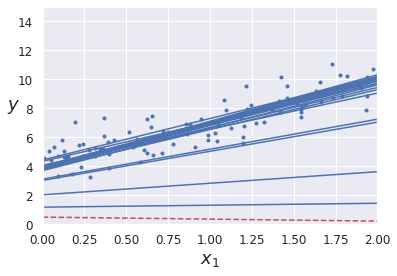

In [13]:
weight_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

weight = np.random.randn(2, 1)  # random init

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(weight)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(weight) - yi)
        eta - learning_schedule(epoch * m + i)
        weight = weight - eta * gradients
        weight_path_sgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))
        
        
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()    

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

##### 4.2.3 미니배치 경사 하강법

In [16]:
weight_path_mgd = []

n_iterations = 100
minibatch_size = 20

np.random.seed(42)
weight = np.random.randn(2,1)  # random init

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(weight) - yi)
        eta = learning_schedule(t)
        weight = weight - eta * gradients
        weight_path_mgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))

Epoch :010, weight = 
 [[4.11876962]
 [2.71062372]]
Epoch :020, weight = 
 [[4.29567078]
 [2.85337842]]
Epoch :030, weight = 
 [[4.26475032]
 [2.83179316]]
Epoch :040, weight = 
 [[4.2695937 ]
 [2.84744074]]
Epoch :050, weight = 
 [[4.25214635]
 [2.7896408 ]]
Epoch :060, weight = 
 [[4.17570373]
 [2.71753586]]
Epoch :070, weight = 
 [[4.18828417]
 [2.73913778]]
Epoch :080, weight = 
 [[4.23775075]
 [2.79420372]]
Epoch :090, weight = 
 [[4.19059905]
 [2.7524648 ]]
Epoch :100, weight = 
 [[4.15421822]
 [2.69721385]]


In [17]:
weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

In [18]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows'):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else:
    print('error')

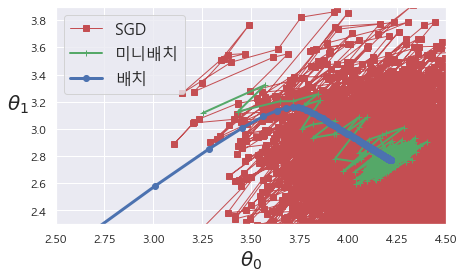

In [19]:
plt.figure(figsize=(7,4))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-+", linewidth=2, label="미니배치")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-o", linewidth=3, label="배치")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

### 4.3 다항 회귀


$$
y = w_0 + w_1 x_1 + w_2 x_2^{2} + \cdots w_n x_n^{m} 
$$

In [20]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

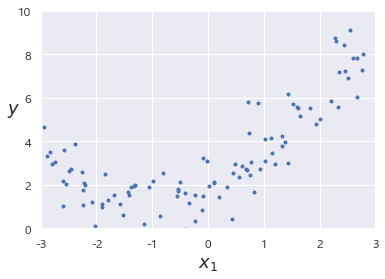

In [21]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print('X[0] :', X[0])
print('X_poly[0] :', X_poly[0])

X[0] : [-2.21391229]
X_poly[0] : [-2.21391229  4.90140762]


In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lin_reg.intercept_, lin_reg.coef_

(array([1.90326313]), array([[1.02460776, 0.49046516]]))

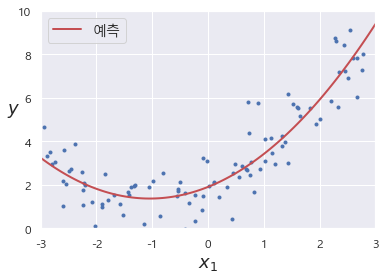

In [25]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### 4.4 학습 곡선

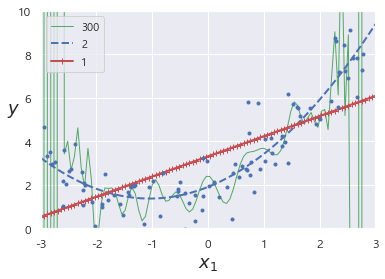

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 모델의 학습 곡선을 그리는 함수 정의
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("훈련 세트 크기", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)  

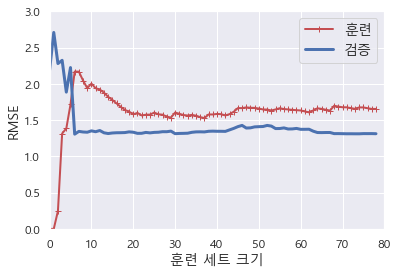

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()          

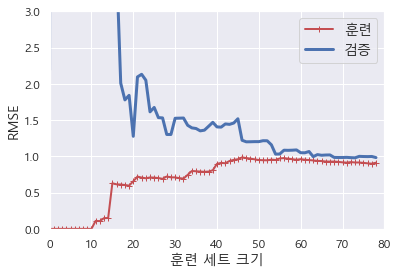

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                   

- 훈련 데이터(train set)의 오차가 선형 회귀 모델 보다 훨씬 낮은것을 알 수 있다.
- 그리고 다항 회귀 모델이 훈련 데이터의 오차가 검증(test set) 데이터 보다 낮은것을 알 수 있는데, 이것이 바로 Overfitting되었다는 증거이다.

### 4.5 규제가 있는  선형 모델

##### 4.5.1 릿지 회귀

- 릿지 회귀의 비용 함수
$$
J(w) = \text{MSE}(w) + \lambda \sum_{i=1}^{n}{w_{i}^{2}}
$$

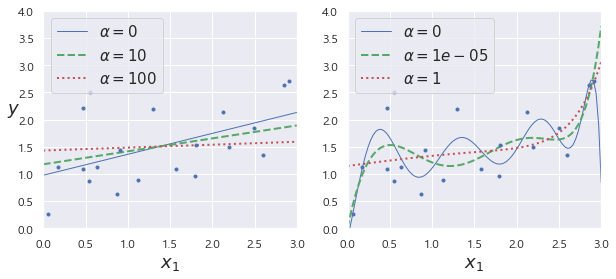

In [30]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

- 릿지 회귀를 적용하면 직선에 가까워진다.

- 릿지 회귀의 정규방정식

$$
\hat{\mathbf{W}} = \left( \mathbf{X}^{T} \cdot \mathbf{X} + \lambda I \right)^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}
$$

In [33]:
# 사이킷런을 이용한 릿지 회귀
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)  # alpha == lambda
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [34]:
# SGD에서 L2규제 => 릿지 회귀와 동일
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([1.13500145])

##### 4.5.2 라쏘 회귀

$$
J(w) = \text{MSE}(w) + \lambda \sum_{i=1}^{n}{\left| w_i \right|}
$$

라쏘 회귀의 중요한 특징은 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 버린다. 따라서, 라쏘 회귀는 모델에 필요한 특성을 선택하여 **희소 모델**(sparse model)을 만든다.

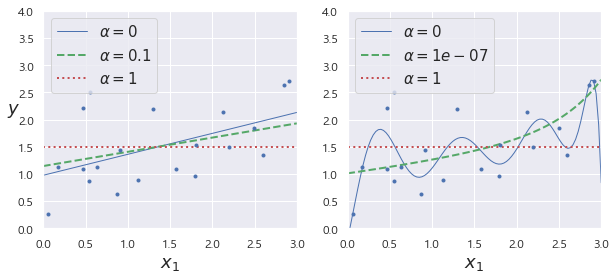

In [35]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

In [39]:
# 사이킷런 라쏘 회귀
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [40]:
# SGD회귀 에서 L1규제 => 라쏘 회귀와 동일
sgd_reg = SGDRegressor(max_iter=5, penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([1.13498188])

##### 4.5.3 엘라스틱넷

**엘라스틱 넷**(Elastic Net)은 릿지(Ridge) 회귀와 라쏘(Lasso) 회귀를 절충한 모델이다. 

$$
J(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{w_i}^2 + \left( 1 - \alpha \right) \sum_{i=1}^{n}{\left| w_i \right|}, \quad \alpha = \frac{\lambda_2}{\lambda_2 + \lambda_1}
$$

- $\lambda_2$ : $L_2$, 즉 릿지 회귀의 하이퍼파라미터
- $\lambda_1$ : $L_1$, 즉 라쏘 회귀의 하이퍼파라미터

In [41]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

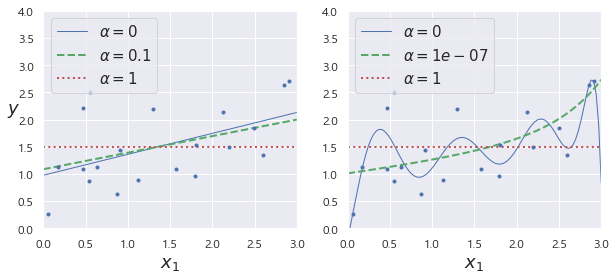

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

##### 4.5.4 조기 종료

In [45]:
import warnings
warnings.filterwarnings(action='ignore')

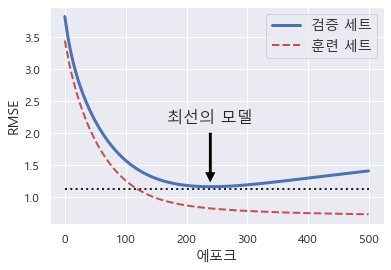

In [46]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('최선의 모델',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="훈련 세트")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("에포크", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

### 4.6 로지스틱 회귀

##### 4.6.1 확률 추정

로지스틱 회귀는 선형 회귀(linear regression)과 같이 입력 특성(feature)의 가중치 합을 계산한 뒤 로지스틱 함수(sigmoid)를 적용해 출력값을 계산한다. 

$$
\hat{p} = h_{w}(\mathbf{x}) = \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)
$$

위의 식에서 $\sigma(\cdot)$이 바로 로지스틱(또는 로짓) 함수이며 0과 1사이의 값을 출력하는 **시그모이드 함수**(sigmoid function)이다.

$$
\sigma(x) = \frac{1}{1 + \text{exp}(-x)}
$$

로지스틱 회귀의 모델은 아래와 같이 할 수 있다. 하지만, 상황에 따라 임계값(threshold)를 조절해줄 수 있다.

$$
\hat{y} = \begin{cases} 0 \quad \hat{p} < 0.5 \\ 1 \quad \hat{p} \ge 0.5 \end{cases}
$$

##### 4.6.2 훈련과 비용 함수

전체 Train Set에 대한 비용 함수는 모든 데이터에 대한 비용의 평균이며, 이것을 **로그 손실**(log loss)라고 한다. 

$$
J(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}
$$

##### 4.6.3 결정 경계

In [49]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [51]:
iris_df = pd.DataFrame(iris['data'], columns=iris.feature_names)
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [52]:
X = iris['data'][:, 3:]  # 꽃잎 너비
y = (iris['target'] == 2).astype(np.int)  # Verginca면 1 아니면 0

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

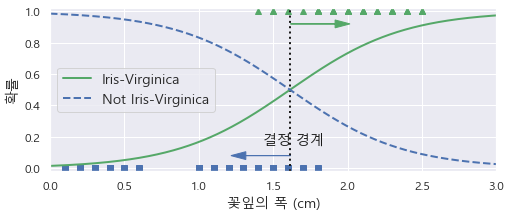

In [62]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "결정 경계", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("꽃잎의 폭 (cm)", fontsize=14)
plt.ylabel("확률", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

- 1.6cm보다 크면 Iris-Verginica로 분류

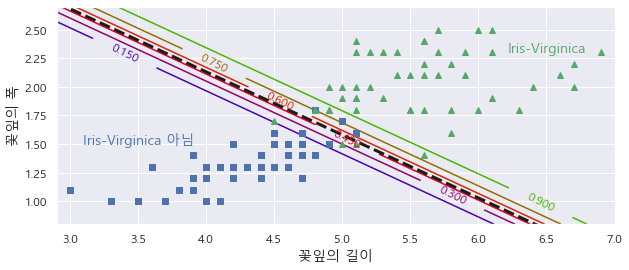

In [63]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Iris-Virginica 아님", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

##### 4.6.4 소프트맥스 회귀

- 소프트 맥스 함수
$$
\hat{p}_k = \sigma \left( s(\mathbf{x}) \right)_k = \frac{ \text{exp} \left( S_k(\mathbf{x}) \right)}{\sum_{j=1}^{K}{\text{exp} \left( S_j (\mathbf{x}) \right)}}
$$

- $K$ : 클래스의 수
- $s(\mathbf{x})$ : 데이터 샘플 $\mathbf{x}$에 대한 각 클래스의 점수를 담고 있는 벡터
- $\sigma \left( S(\mathbf{x}) \right)_k$ : 샘플 $\mathbf{x}$에 대한 클래스 $k$에 속할 추정 확률 벡터

소프트맥스 회귀의 학습을 위한 손실함수(loss function)은 **크로스 엔트로피**(cross entropy)이며 다음과 같다.

$$
J(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\sum_{k=1}^{K}{y_k^{(i)} \log{\left( \hat{p}_k^{(i)} \right)}}}
$$

- $i$번째 샘플에 대한 타겟 클래스가 $k$일 때, $y_k^{(i)}$가 1이고, 나머지는 0이 된다.

In [64]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

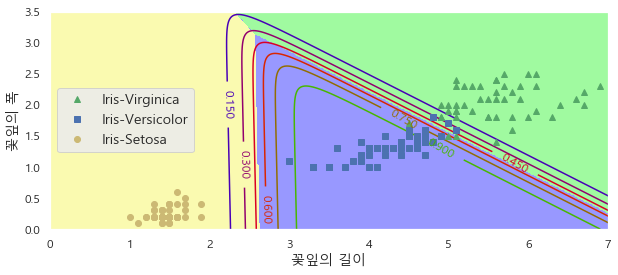

In [65]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()